In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [23]:
def k_bandits_sample_average_stationary(arms_number, mean, variance_action_values, variance_rewards, epsilon, runs, time_steps, initial_estimated_action_value=0):
    
    average_rewards = np.zeros(shape=time_steps, dtype=float)
    optimal_actions = np.zeros(shape=time_steps, dtype=float)
    
    run = 0
    while (run < runs):

        true_action_values = np.random.normal(loc=mean, scale=variance_action_values, size=arms_number)
        optimal_action = np.where(true_action_values == np.amax(true_action_values))[0]

        estimated_action_values = np.zeros(shape=(2, arms_number), dtype=float) 
        estimated_action_values[0] = estimated_action_values[0] + initial_estimated_action_value

        exploration_steps = np.random.randint(0, time_steps - 1, size= int(epsilon * time_steps))

        time_step = 0
        while ( time_step  < time_steps ):
            q, n = estimated_action_values[0], estimated_action_values[1]

            if (time_step in exploration_steps) :
                action = random.randint(0, arms_number-1)
            else :
                actions_maximizes_estimated_action_value, = np.where(q == np.amax(q))
                action = np.random.choice(actions_maximizes_estimated_action_value, size=None, replace=False, p=None)
                
            if (action in optimal_action):
                optimal_actions[time_step] = optimal_actions[time_step] + 1 /runs

            reward = np.random.normal(loc=true_action_values[action], scale=variance_rewards)

            average_rewards[time_step] = average_rewards[time_step] + reward / runs

            n[action] = n[action] + 1

            q[action] = q[action] + (reward - q[action]) / n[action]

            time_step = time_step + 1


        run = run + 1
    
    return average_rewards, optimal_actions

In [20]:
def k_bandits_fixed_step_size_stationary(arms_number, mean, variance_action_values, variance_rewards, epsilon, runs, time_steps, step_size, initial_estimated_action_value=0):
    
    average_rewards = np.zeros(shape=time_steps, dtype=float)
    optimal_actions = np.zeros(shape=time_steps, dtype=float)
    
    run = 0
    while (run < runs):

        true_action_values = np.random.normal(loc=mean, scale=variance_action_values, size=k)
        optimal_action = np.where(true_action_values == np.amax(true_action_values))[0]

        estimated_action_values = np.zeros(shape=(2, arms_number), dtype=float) 
        estimated_action_values[0] = estimated_action_values[0] + initial_estimated_action_value

        exploration_steps = np.random.randint(0, time_steps - 1, size= int(epsilon * time_steps))

        time_step = 0
        while ( time_step  < time_steps ):
            q, n = estimated_action_values[0], estimated_action_values[1]

            if (time_step in exploration_steps) :
                action = random.randint(0, arms_number-1)
            else :
                actions_maximizes_estimated_action_value, = np.where(q == np.amax(q))
                action = np.random.choice(actions_maximizes_estimated_action_value, size=None, replace=False, p=None)
                
            if (action in optimal_action):
                optimal_actions[time_step] = optimal_actions[time_step] + 1 /runs

            reward = np.random.normal(loc=true_action_values[action], scale=variance_rewards)

            average_rewards[time_step] = average_rewards[time_step] + reward / runs

            n[action] = n[action] + 1

            q[action] = q[action] + (reward - q[action]) * step_size

            time_step = time_step + 1


        run = run + 1
    
    return average_rewards, optimal_actions

In [48]:
def k_bandits_fixed_step_size_stationary_with_trace(arms_number, mean, variance_action_values, variance_rewards, epsilon, runs, time_steps, step_size, initial_estimated_action_value=0):
    
    average_rewards = np.zeros(shape=time_steps, dtype=float)
    optimal_actions = np.zeros(shape=time_steps, dtype=float)
    
    run = 0
    while (run < runs):

        true_action_values = np.random.normal(loc=mean, scale=variance_action_values, size=k)
        optimal_action = np.where(true_action_values == np.amax(true_action_values))[0]

        estimated_action_values = np.zeros(shape=arms_number, dtype=float) 
        estimated_action_values[0] = estimated_action_values[0] + initial_estimated_action_value

        exploration_steps = np.random.randint(0, time_steps - 1, size= int(epsilon * time_steps))
        
        processed_step_size_parameters = np.zeros(shape=(2, arms_number), dtype=float) 

        time_step = 0
        while ( time_step  < time_steps ):
            q = estimated_action_values
            b, o = processed_step_size_parameters[0], processed_step_size_parameters[1]

            if (time_step in exploration_steps) :
                action = random.randint(0, arms_number-1)
            else :
                actions_maximizes_estimated_action_value, = np.where(q == np.amax(q))
                action = np.random.choice(actions_maximizes_estimated_action_value, size=None, replace=False, p=None)
                
            if (action in optimal_action):
                optimal_actions[time_step] = optimal_actions[time_step] + 1 /runs

            reward = np.random.normal(loc=true_action_values[action], scale=variance_rewards)

            average_rewards[time_step] = average_rewards[time_step] + reward / runs
            
            o[action] = o[action] + step_size*(1 - o[action])
            
            b[action] = step_size / o[action]
            
            q[action] = q[action] + (reward - q[action]) * b[action]

            time_step = time_step + 1

        run = run + 1
    
    return average_rewards, optimal_actions

In [10]:
def k_bandits_sample_average_nonstationary(arms_number, mean, variance_action_values, variance_action_values_increment, variance_rewards, epsilon, runs, time_steps):
    
    average_rewards = np.zeros(shape=time_steps, dtype=float)
    optimal_actions = np.zeros(shape=time_steps, dtype=float)
    
    run = 0
    while (run < runs):
        
        true_action_values = np.full(shape=arms_number, fill_value=0.5, dtype=float)

        estimated_action_values = np.zeros(shape=(2, arms_number), dtype=float) 

        exploration_steps = np.random.randint(0, time_steps - 1, size= int(epsilon * time_steps))

        time_step = 0
        while ( time_step  < time_steps ):
            
            q, n = estimated_action_values[0], estimated_action_values[1]

            if (time_step in exploration_steps) :
                action = random.randint(0, arms_number-1)
            else :
                actions_maximizes_estimated_action_value, = np.where(q == np.amax(q))
                action = np.random.choice(actions_maximizes_estimated_action_value, size=None, replace=False, p=None)
                
            optimal_action = np.where(true_action_values == np.amax(true_action_values))[0]
            if (action in optimal_action):
                optimal_actions[time_step] = optimal_actions[time_step] + 1 /runs

            reward = np.random.normal(loc=true_action_values[action], scale=variance_rewards)

            average_rewards[time_step] = average_rewards[time_step] + reward / runs

            n[action] = n[action] + 1

            q[action] = q[action] + (reward - q[action]) / n[action]

            time_step = time_step + 1
            
            true_action_values = true_action_values + np.random.normal(loc=mean, scale=variance_action_values_increment, size=arms_number)


        run = run + 1
    
    return average_rewards, optimal_actions

In [11]:
def k_bandits_fixed_step_size_nonstationary(arms_number, mean, variance_action_values, variance_action_values_increment, variance_rewards, epsilon, runs, time_steps, step_size):
    
    average_rewards = np.zeros(shape=time_steps, dtype=float)
    optimal_actions = np.zeros(shape=time_steps, dtype=float)
    
    run = 0
    while (run < runs):
        
        true_action_values = np.full(shape=arms_number, fill_value=0.5, dtype=float)

        estimated_action_values = np.zeros(shape=arms_number, dtype=float) 

        exploration_steps = np.random.randint(0, time_steps - 1, size= int(epsilon * time_steps))

        time_step = 0
        while ( time_step  < time_steps ):
            
            q = estimated_action_values

            if (time_step in exploration_steps) :
                action = random.randint(0, arms_number-1)
            else :
                actions_maximizes_estimated_action_value, = np.where(q == np.amax(q))
                action = np.random.choice(actions_maximizes_estimated_action_value, size=None, replace=False, p=None)
                
            optimal_action = np.where(true_action_values == np.amax(true_action_values))[0]
            if (action in optimal_action):
                optimal_actions[time_step] = optimal_actions[time_step] + 1 /runs

            reward = np.random.normal(loc=true_action_values[action], scale=variance_rewards)

            average_rewards[time_step] = average_rewards[time_step] + reward / runs

            q[action] = q[action] + (reward - q[action]) * step_size

            time_step = time_step + 1
            
            true_action_values = true_action_values + np.random.normal(loc=mean, scale=variance_action_values_increment, size=arms_number)


        run = run + 1
    
    return average_rewards, optimal_actions

In [63]:
def k_bandits_upper_confidence_bounded_stationary(arms_number, mean, variance_action_values, variance_rewards, epsilon, runs, time_steps, c, initial_estimated_action_value=0):
    
    average_rewards = np.zeros(shape=time_steps, dtype=float)
    optimal_actions = np.zeros(shape=time_steps, dtype=float)
    
    run = 0
    while (run < runs):

        true_action_values = np.random.normal(loc=mean, scale=variance_action_values, size=arms_number)
        optimal_action = np.where(true_action_values == np.amax(true_action_values))[0]

        estimated_action_values = np.zeros(shape=(2, arms_number), dtype=float) 
        estimated_action_values[0] = estimated_action_values[0] + initial_estimated_action_value

        exploration_steps = np.random.randint(0, time_steps - 1, size= int(epsilon * time_steps))

        time_step = 0
        while ( time_step  < time_steps ):
            q, n = estimated_action_values[0], estimated_action_values[1]

            if (time_step in exploration_steps) :
                action = random.randint(0, arms_number-1)
            else :
                action = maximizing_action(q, n, c, time_step)
                
            if (action in optimal_action):
                optimal_actions[time_step] = optimal_actions[time_step] + 1 /runs

            reward = np.random.normal(loc=true_action_values[action], scale=variance_rewards)

            average_rewards[time_step] = average_rewards[time_step] + reward / runs

            n[action] = n[action] + 1

            q[action] = q[action] + (reward - q[action]) / n[action]

            time_step = time_step + 1


        run = run + 1
    
    return average_rewards, optimal_actions

In [60]:
def maximizing_action(q, n, c, time_step):
    
    never_selected_actions = np.where(n == 0)[0]
    
    if (len(never_selected_actions) == 0):
        
        confidence = c * np.sqrt( np.log(time_step) * np.power(n, -1) ) 
        ucb_q = q + confidence
        
        maximizing_actions = np.where(ucb_q == np.amax(ucb_q))[0]

        return np.random.choice(maximizing_actions, size=None, replace=False, p=None)

    return np.random.choice(never_selected_actions, size=None, replace=False, p=None)

In [9]:
def k_gradient_bandits_algo_stationary(arms_number, mean, variance_action_values, variance_rewards, runs, time_steps, step_size, with_baseline=1):
    
    average_rewards = np.zeros(shape=time_steps, dtype=float)
    optimal_actions = np.zeros(shape=time_steps, dtype=float)
    
    run = 0
    while (run < runs):

        true_action_values = np.random.normal(loc=mean, scale=variance_action_values, size=arms_number)
        optimal_action = np.where(true_action_values == np.amax(true_action_values))[0]

        preference = np.zeros(shape=arms_number, dtype=float) 

        time_step = 0
        baseline_reward = 0
        while ( time_step  < time_steps ):
            
            preferences_sum = np.sum(np.exp(preference))
            
            action_probabilities = np.exp(preference) * (1 / preferences_sum)

            action = np.random.choice(arms_number, size=None, replace=False, p=action_probabilities)
                
            if (action in optimal_action):
                optimal_actions[time_step] = optimal_actions[time_step] + 1 /runs

            reward = np.random.normal(loc=true_action_values[action], scale=variance_rewards)
            
            baseline_reward = baseline_reward + (reward - baseline_reward) / (time_step + 1)

            average_rewards[time_step] = average_rewards[time_step] + reward / runs
            
            for i in range(0, arms_number):
                if (i == action):
                    preference[i] = preference[i] + step_size * (reward - baseline_reward * with_baseline) * (1 - action_probabilities[i])
                else:
                    preference[i] = preference[i] - step_size * (reward - baseline_reward * with_baseline) * action_probabilities[i]

            time_step = time_step + 1


        run = run + 1
    
    return average_rewards, optimal_actions

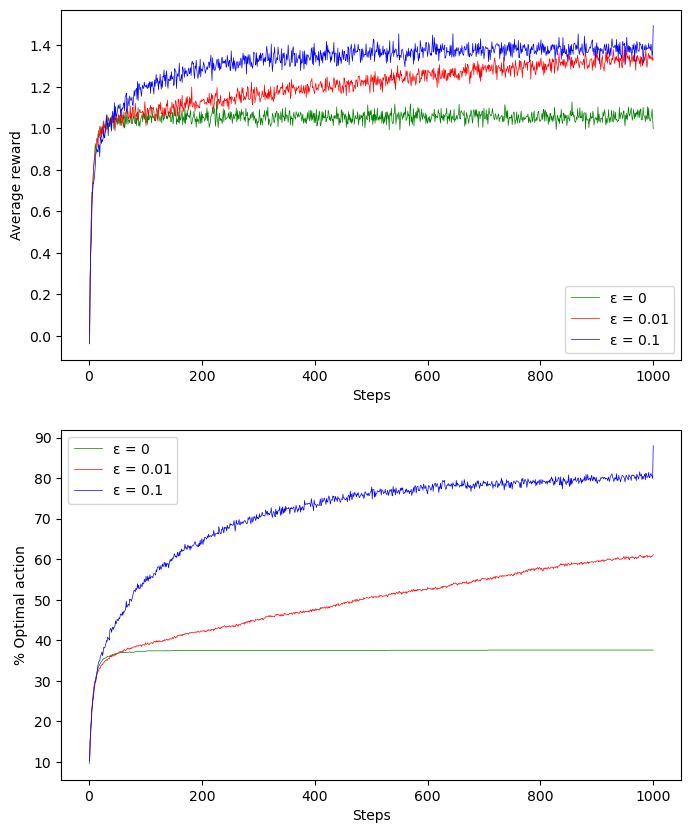

In [25]:
epsilon = [0, 0.01, 0.1]
runs = 2000
time_steps = 1000
arms_number = 10
mean = 0.0
variance_action_values = 1.0
variance_rewards = 1.0

linecolors = ['green', 'red', 'blue']
labels = ['\u03B5 = 0', '\u03B5 = 0.01', '\u03B5 = 0.1']
steps = np.linspace(1, time_steps, time_steps, endpoint=True)

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=False,figsize=(8, 10))
for e in epsilon:
    average_rewards, optimal_actions = k_bandits_sample_average_stationary(arms_number, mean, variance_action_values, variance_rewards, e, runs, time_steps)
    ax0.plot(steps, average_rewards, linewidth=0.5, color=linecolors[epsilon.index(e)], label=labels[epsilon.index(e)])
    ax1.plot(steps, optimal_actions*100, linewidth=0.5, color=linecolors[epsilon.index(e)], label=labels[epsilon.index(e)])
ax0.set_ylabel('Average reward')
ax0.set_xlabel('Steps')
ax0.legend()
ax1.set_ylabel('% Optimal action')
ax1.set_xlabel('Steps')
ax1.legend()
plt.show()

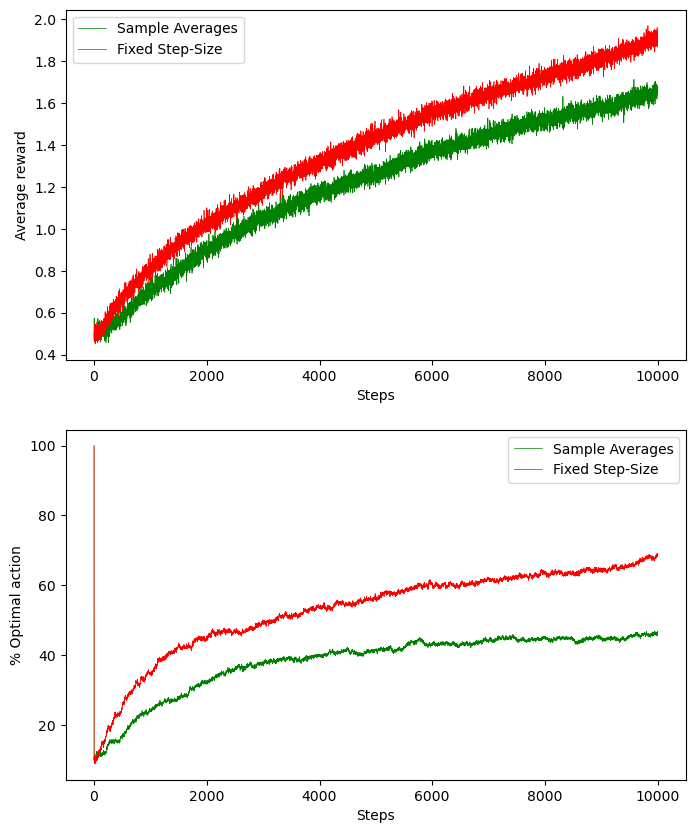

In [31]:
epsilon = 0.01
runs = 2000
time_steps = 10000
arms_number = 10
mean = 0.0
variance_action_values = 1.0
variance_rewards = 1.0
variance_action_values_increment = 0.01
step_size = 0.1

steps = np.linspace(1, time_steps, time_steps, endpoint=True)

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=False,figsize=(8, 10))

average_rewards_sample_averages, optimal_actions_sample_averages = k_bandits_sample_average_nonstationary(arms_number, mean, variance_action_values, variance_action_values_increment, variance_rewards, epsilon, runs, time_steps)
average_rewards_fixed_step_size, optimal_actions_fixed_step_size = k_bandits_fixed_step_size_nonstationary(arms_number, mean, variance_action_values, variance_action_values_increment, variance_rewards, epsilon, runs, time_steps, step_size)

ax0.plot(steps, average_rewards_sample_averages, linewidth=0.5, color='green', label='Sample Averages')
ax0.plot(steps, average_rewards_fixed_step_size, linewidth=0.5, color='red', label='Fixed Step-Size')

ax1.plot(steps, optimal_actions_sample_averages*100, linewidth=0.5, color='green', label='Sample Averages')
ax1.plot(steps, optimal_actions_fixed_step_size*100, linewidth=0.5, color='red', label='Fixed Step-Size')

ax0.set_ylabel('Average reward')
ax0.set_xlabel('Steps')
ax0.legend()

ax1.set_ylabel('% Optimal action')
ax1.set_xlabel('Steps')
ax1.legend()

plt.show()

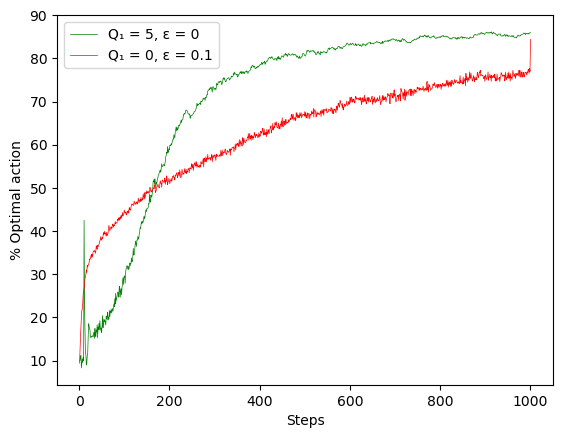

In [22]:
epsilon = [0, 0.1]
initial_estimation = [5, 0]
runs = 2000
time_steps = 1000
arms_number = 10
mean = 0.0
variance_action_values = 1.0
variance_rewards = 1.0
arms_number = 10s
step_size = 0.1

linecolors = ['green', 'red']
labels = ['Q\u2081 = 5, \u03B5 = 0', 'Q\u2081 = 0, \u03B5 = 0.1']
steps = np.linspace(1, time_steps, time_steps, endpoint=True)

fig, ax = plt.subplots()
for e in epsilon:
    average_rewards, optimal_actions = k_bandits_fixed_step_size_stationary(arms_number, mean, variance_action_values, variance_rewards, e, runs, time_steps, step_size, initial_estimation[epsilon.index(e)])
    ax.plot(steps, optimal_actions*100, linewidth=0.5, color=linecolors[epsilon.index(e)], label=labels[epsilon.index(e)])
ax.set_ylabel('% Optimal action')
ax.set_xlabel('Steps')
ax.legend()
plt.show()

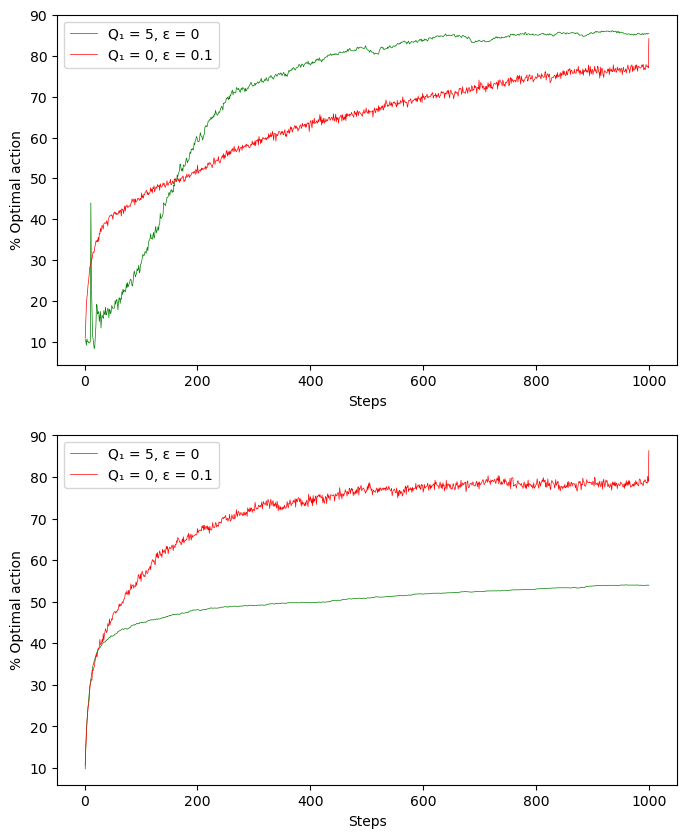

In [49]:
epsilon = [0, 0.1]
initial_estimation = [5, 0]
runs = 2000
time_steps = 1000
arms_number = 10
mean = 0.0
variance_action_values = 1.0
variance_rewards = 1.0
arms_number = 10
step_size = 0.1

linecolors = ['green', 'red']
labels = ['Q\u2081 = 5, \u03B5 = 0', 'Q\u2081 = 0, \u03B5 = 0.1']
steps = np.linspace(1, time_steps, time_steps, endpoint=True)

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=False,figsize=(8, 10))
for e in epsilon:
    average_rewards, optimal_actions = k_bandits_fixed_step_size_stationary(arms_number, mean, variance_action_values, variance_rewards, e, runs, time_steps, step_size, initial_estimation[epsilon.index(e)])
    average_rewards_b, optimal_actions_b = k_bandits_fixed_step_size_stationary_with_trace(arms_number, mean, variance_action_values, variance_rewards, e, runs, time_steps, step_size, initial_estimation[epsilon.index(e)])
    ax0.plot(steps, optimal_actions*100, linewidth=0.5, color=linecolors[epsilon.index(e)], label=labels[epsilon.index(e)])
    ax1.plot(steps, optimal_actions_b*100, linewidth=0.5, color=linecolors[epsilon.index(e)], label=labels[epsilon.index(e)])
ax0.set_ylabel('% Optimal action')
ax0.set_xlabel('Steps')
ax0.legend()
ax1.set_ylabel('% Optimal action')
ax1.set_xlabel('Steps')
ax1.legend()
plt.show()

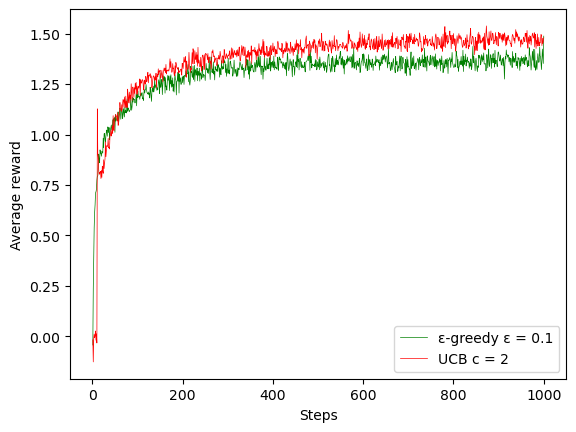

In [64]:
epsilon = [0.1, 0.0]
initial_estimation = [0, 0]
c = 2
runs = 2000
time_steps = 1000
arms_number = 10
mean = 0.0
variance_action_values = 1.0
variance_rewards = 1.0
arms_number = 10

linecolors = ['green', 'red']
labels = ['\u03B5-greedy \u03B5 = 0.1', 'UCB c = 2']
steps = np.linspace(1, time_steps, time_steps, endpoint=True)

fig, ax = plt.subplots()
average_rewards, optimal_actions = k_bandits_sample_average_stationary(arms_number, mean, variance_action_values, variance_rewards, epsilon[0], runs, time_steps, initial_estimation[0])
average_rewards_ucb, optimal_actions_ucb = k_bandits_upper_confidence_bounded_stationary(arms_number, mean, variance_action_values, variance_rewards, epsilon[1], runs, time_steps, c, initial_estimation[1])
ax.plot(steps, average_rewards, linewidth=0.5, color=linecolors[0], label=labels[0])
ax.plot(steps, average_rewards_ucb, linewidth=0.5, color=linecolors[1], label=labels[1])    
ax.set_ylabel('Average reward')
ax.set_xlabel('Steps')
ax.legend()
plt.show()

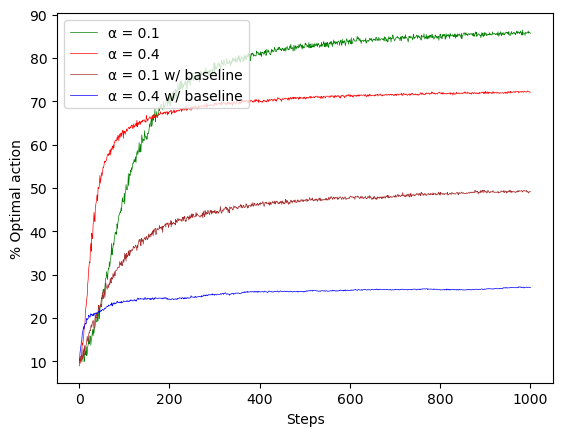

In [12]:
runs = 2000
time_steps = 1000
arms_number = 10
mean = 4.0
variance_action_values = 1.0
variance_rewards = 1.0
step_size = [0.1, 0.4]
linecolors = ['green', 'red', 'brown', 'blue']
labels = ['\u03B1 = 0.1', '\u03B1 = 0.4', '\u03B1 = 0.1 w/ baseline', '\u03B1 = 0.4 w/ baseline']
steps = np.linspace(1, time_steps, time_steps, endpoint=True)

fig, ax = plt.subplots()
average_rewards, optimal_actions = k_gradient_bandits_algo_stationary(arms_number, mean, variance_action_values, variance_rewards, runs, time_steps, step_size[0], with_baseline=1)
ax.plot(steps, optimal_actions*100, linewidth=0.5, color=linecolors[0], label=labels[0])

average_rewards, optimal_actions = k_gradient_bandits_algo_stationary(arms_number, mean, variance_action_values, variance_rewards, runs, time_steps, step_size[1], with_baseline=1)
ax.plot(steps, optimal_actions*100, linewidth=0.5, color=linecolors[1], label=labels[1])   

average_rewards, optimal_actions = k_gradient_bandits_algo_stationary(arms_number, mean, variance_action_values, variance_rewards, runs, time_steps, step_size[0], with_baseline=0)
ax.plot(steps, optimal_actions*100, linewidth=0.5, color=linecolors[2], label=labels[2])

average_rewards, optimal_actions = k_gradient_bandits_algo_stationary(arms_number, mean, variance_action_values, variance_rewards, runs, time_steps, step_size[1], with_baseline=0)
ax.plot(steps, optimal_actions*100, linewidth=0.5, color=linecolors[3], label=labels[3]) 

ax.set_ylabel('% Optimal action')
ax.set_xlabel('Steps')
ax.legend()
plt.show()